In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from DataLoader import MolDataset, get_setup_files, get_setup_files_with_folds

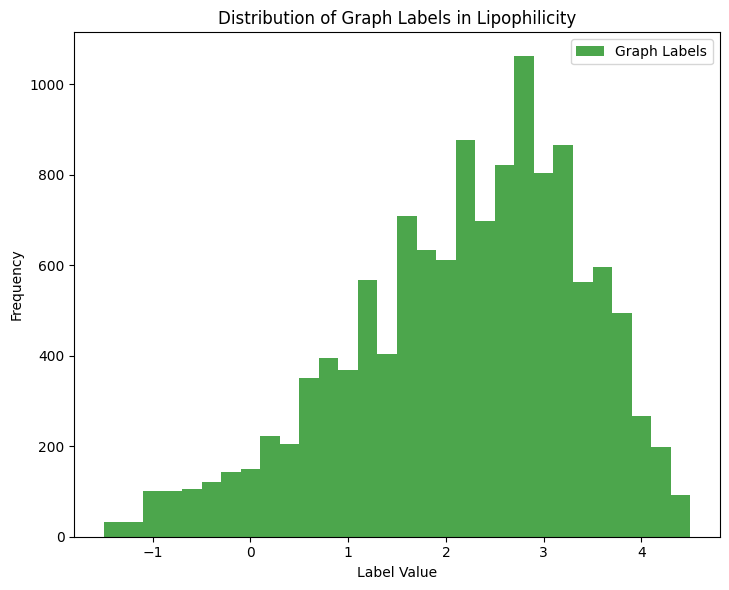

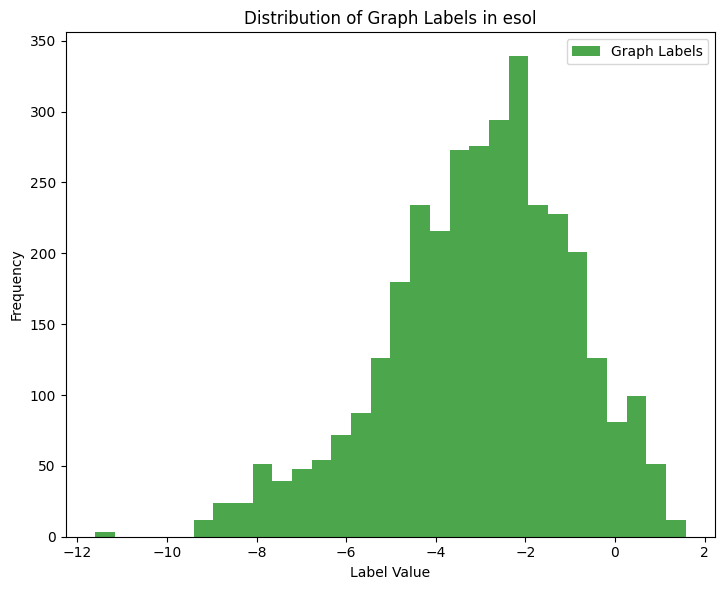

In [4]:
dataset_column_dict = {
                       'Lipophilicity':['Lipophilicity'],
                       'esol':['measured log solubility in mols per litre']}
dataset_name = 'esol'
task_type = 'Regression'
for axs_i,dataset_name in enumerate(['Lipophilicity','esol']):
    # Access training and validation data
    training_data = MolDataset(root=".", split='training',csv_file=f"datasets/_{dataset_name}.csv", label_col = dataset_column_dict[dataset_name], task_type = task_type)
    validation_data = MolDataset(root=".", split='valid',csv_file=f"datasets/_{dataset_name}.csv", label_col = dataset_column_dict[dataset_name], task_type = task_type)
    test_data = MolDataset(root=".", split='test',csv_file=f"datasets/_{dataset_name}.csv", label_col = dataset_column_dict[dataset_name], task_type = task_type)

    # Combine node features and labels from all splits
    all_labels = np.concatenate([training_data.labels, validation_data.labels, test_data.labels], axis=0)

    # Plotting
    plt.figure(figsize=(14, 6))

    # Distribution of Graph Labels
    plt.subplot(1, 2, axs_i+1)
    plt.hist(all_labels, bins=30, color='green', alpha=0.7, label='Graph Labels')
    plt.title(f"Distribution of Graph Labels in {dataset_name}")
    plt.xlabel("Label Value")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
input()

In [ ]:


# Load the Tox21 dataset CSV
df = pd.read_csv("tox21.csv")

# Define columns representing neural receptors and stress receptors
# Replace 'NR_X' and 'SR_Y' with the actual column names for neural and stress receptors in the Tox21 CSV
neural_receptor_columns = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma']  # example
stress_receptor_columns = ['SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']  # example

# Define a function to assign classes based on receptor activity
def assign_tox21_class(row):
    # Check if at least one neural receptor is active
    neural_active = row[neural_receptor_columns].any()
    # Check if at least one stress receptor is active
    stress_active = row[stress_receptor_columns].any()

    # Assign classes based on the conditions
    if neural_active and stress_active:
        return 3  # Both are active
    elif neural_active:
        return 1  # At least 1 neural receptor is active
    elif stress_active:
        return 2  # At least 1 stress receptor is active
    else:
        return 4  # None are active

# Apply the function to each row and create a new column 'tox21'
df['tox21'] = df.apply(assign_tox21_class, axis=1)

# Save the modified dataset
df.to_csv("tox21_multiclass.csv", index=False)

# Display the first few rows to verify
print(df.head())


In [ ]:
import matplotlib.pyplot as plt
# Check the distribution of the new 'tox21' labels
label_counts = df['tox21'].value_counts().sort_index()

# Print the counts for each label
print(label_counts)

# Plot the distribution as a bar plot
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Tox21 Multi-Class Labels")
plt.xlabel("Tox21 Label")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3], ["1: Neural Active", "2: Stress Active", "3: Both Active", "4: None Active"], rotation=45)
plt.show()

In [ ]:
df.to_csv("to21_multiclass")

# QM9

In [ ]:
import torch
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader

# Set the path where you want to save the dataset
dataset_path = 'path/to/qm9_dataset'

# Load the dataset
dataset = QM9(root=dataset_path)

# Split into train, validation, and test sets
train_dataset = dataset[:100000]
val_dataset = dataset[100000:110000]
test_dataset = dataset[110000:]

# Use a DataLoader to batch and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
for data in train_loader:
    print(data)
    print(f'Atomic numbers: {data.z}')
    print(f'3D coordinates: {data.pos}')
    print(f'Target properties: {data.y}')
    print(f'Edge index: {data.edge_index}')
    break  # Inspect the first batch only
